In [1]:
import pymc3 as pm
import numpy as np
import pandas as pd
import arviz as az
import scipy
from matplotlib import pyplot as plt

**Exercise 8.4. [Purpose: Explore the prior on a difference of parameters
implied from the priors on the individual parameters.]**

(A) Reproduce Figure 8.7 in Section 8.5. Explain how you did it.

In [2]:
myData = pd.read_csv('../../050-jags2pymc3/z6N8z2N7.csv') # the dataset from the book's bundle
y = myData.y
Ntotal = len (myData)
Nsubj = len (myData.s.unique())
r = myData[myData.s == 'Reginald']
t = myData[myData.s == 'Tony']
zN1 = sum(r.y) / len(r)
zN2 = sum(t.y) / len(t)

with pm.Model() as model4:
    theta1 = pm.Beta (name='theta1', alpha=2, beta=2)
    theta2 = pm.Beta (name='theta2', alpha=2, beta=2)
    theta12 = pm.Deterministic ('theta1-theta2', theta1-theta2) # Observe, new PyMC3 construct, to create a derived variable
    #y1 = pm.Bernoulli (name='y1', p=theta1)
    #y2 = pm.Bernoulli (name='y2', p=theta2)
    trace = pm.sample(10000)
    
fig, ax = plt.subplots(2,2, figsize=(10,10))

pm.plots.plot_posterior(trace, var_names=["theta1"], ax=ax[0,0], point_estimate='mode')
ax[0,0].plot(zN1, 0, marker='+', markersize=16, color='C1')

pm.plots.plot_posterior(trace, var_names=["theta2"], ax=ax[1,1], point_estimate='mode')
ax[1,1].plot(zN2, 0, marker='+', markersize=16, color='C1')

pm.plots.plot_posterior(trace, var_names=["theta1-theta2"], ax=ax[0,1], point_estimate='mode', credible_interval=0.95, ref_val=0)
ax[0,1].plot(zN1 - zN2, 0, marker='+', markersize=16, color='C1')

ax[1,0].plot(trace['theta1'],trace['theta2'], 'x')
ax[1,0].set_ylabel('theta2')
ax[1,0].set_xlabel('theta1')

plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta2, theta1]
Sampling 2 chains, 0 divergences: 100%|██████████| 21000/21000 [00:09<00:00, 2127.56draws/s]


(B) Change the priors on the individual θ’s to beta(θ|1, 1) and produce the figure
anew. Describe its panels and explain.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta2, theta1]
Sampling 2 chains, 0 divergences: 100%|██████████| 21000/21000 [00:10<00:00, 1982.56draws/s]


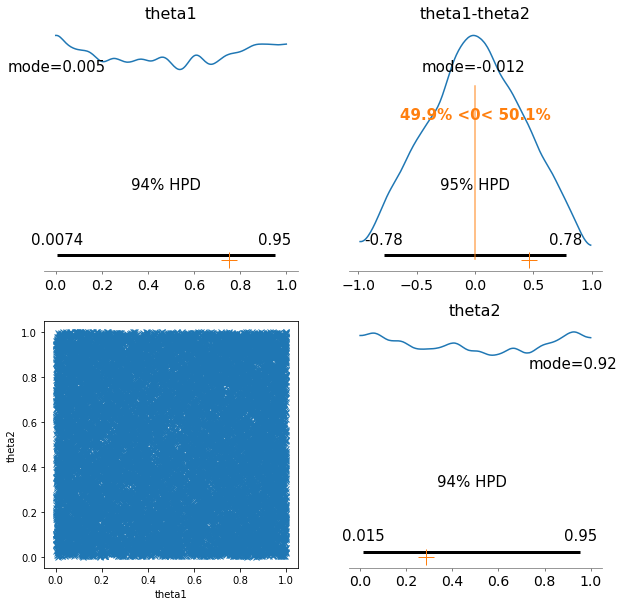

In [3]:
myData = pd.read_csv('../../050-jags2pymc3/z6N8z2N7.csv') # the dataset from the book's bundle
y = myData.y
Ntotal = len (myData)
Nsubj = len (myData.s.unique())
r = myData[myData.s == 'Reginald']
t = myData[myData.s == 'Tony']
zN1 = sum(r.y) / len(r)
zN2 = sum(t.y) / len(t)

with pm.Model() as model4:
    theta1 = pm.Beta (name='theta1', alpha=1, beta=1)
    theta2 = pm.Beta (name='theta2', alpha=1, beta=1)
    theta12 = pm.Deterministic ('theta1-theta2', theta1-theta2) # Observe, new PyMC3 construct, to create a derived variable
    #y1 = pm.Bernoulli (name='y1', p=theta1)
    #y2 = pm.Bernoulli (name='y2', p=theta2)
    trace = pm.sample(10000)
    
fig, ax = plt.subplots(2,2, figsize=(10,10))

pm.plots.plot_posterior(trace, var_names=["theta1"], ax=ax[0,0], point_estimate='mode')
ax[0,0].plot(zN1, 0, marker='+', markersize=16, color='C1')

pm.plots.plot_posterior(trace, var_names=["theta2"], ax=ax[1,1], point_estimate='mode')
ax[1,1].plot(zN2, 0, marker='+', markersize=16, color='C1')

pm.plots.plot_posterior(trace, var_names=["theta1-theta2"], ax=ax[0,1], point_estimate='mode', credible_interval=0.95, ref_val=0)
ax[0,1].plot(zN1 - zN2, 0, marker='+', markersize=16, color='C1')

ax[1,0].plot(trace['theta1'],trace['theta2'], 'x')
ax[1,0].set_ylabel('theta2')
ax[1,0].set_xlabel('theta1')

plt.show()

(C) Change the priors on the individual θ’s to beta(θ|0.5, 0.5) and produce the figure
again. Describe its panels and explain.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta2, theta1]
Sampling 2 chains, 15 divergences: 100%|██████████| 21000/21000 [00:11<00:00, 1753.97draws/s]
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


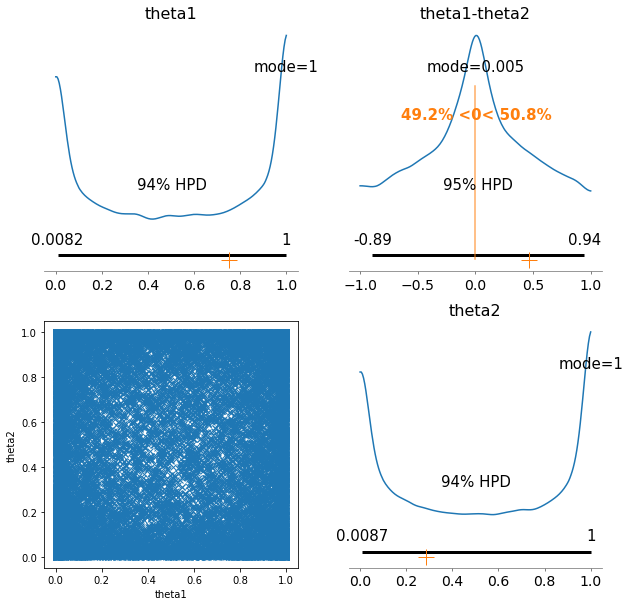

In [4]:
myData = pd.read_csv('../../050-jags2pymc3/z6N8z2N7.csv') # the dataset from the book's bundle
y = myData.y
Ntotal = len (myData)
Nsubj = len (myData.s.unique())
r = myData[myData.s == 'Reginald']
t = myData[myData.s == 'Tony']
zN1 = sum(r.y) / len(r)
zN2 = sum(t.y) / len(t)

with pm.Model() as model4:
    theta1 = pm.Beta (name='theta1', alpha=0.5, beta=0.5)
    theta2 = pm.Beta (name='theta2', alpha=0.5, beta=0.5)
    theta12 = pm.Deterministic ('theta1-theta2', theta1-theta2) # Observe, new PyMC3 construct, to create a derived variable
    #y1 = pm.Bernoulli (name='y1', p=theta1)
    #y2 = pm.Bernoulli (name='y2', p=theta2)
    trace = pm.sample(10000)
    
fig, ax = plt.subplots(2,2, figsize=(10,10))

pm.plots.plot_posterior(trace, var_names=["theta1"], ax=ax[0,0], point_estimate='mode')
ax[0,0].plot(zN1, 0, marker='+', markersize=16, color='C1')

pm.plots.plot_posterior(trace, var_names=["theta2"], ax=ax[1,1], point_estimate='mode')
ax[1,1].plot(zN2, 0, marker='+', markersize=16, color='C1')

pm.plots.plot_posterior(trace, var_names=["theta1-theta2"], ax=ax[0,1], point_estimate='mode', credible_interval=0.95, ref_val=0)
ax[0,1].plot(zN1 - zN2, 0, marker='+', markersize=16, color='C1')

ax[1,0].plot(trace['theta1'],trace['theta2'], 'x')
ax[1,0].set_ylabel('theta2')
ax[1,0].set_xlabel('theta1')

plt.show()